使用正弦函数和一些可加性噪声和生成序列数据，时间步为1、2、...、1000

## 生成数据

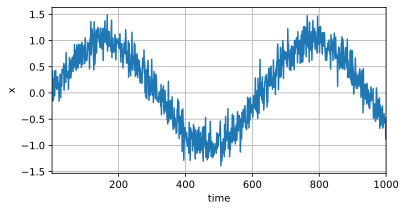

In [17]:
# 无明显作用
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

T = 1000
# time 为 [1, 1001) 的张量
time = torch.arange(1, T + 1, dtype=torch.float32)
# time * 0.01 是为了减少正弦周期数到一个半周期
x = torch.sin(0.01 * time) + torch.normal(0, 0.2, (T,))
d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

## 映射数据
将数据映射为数据对。 `y_t = x_t`，`X_t = [x_t-τ,...,x_t-1]`

In [18]:
tau = 4
features = torch.zeros((T - tau, tau))
for i in range(tau):
    features[:, i] = x[i:T - tau + i]
labels = x[tau:].reshape((-1, 1))

batch_size, n_train = 16, 600
train_iter = d2l.load_array((features[:n_train], labels[:n_train]), batch_size, is_train=True)